In [13]:
import xgboost
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import cross_validation, metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [14]:
train=pd.read_csv("../input/train_4aqQp50.csv")
test = pd.read_csv("../input/test_VJP2kVH.csv")

In [15]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
PRT_ID           7109 non-null object
AREA             7109 non-null object
INT_SQFT         7109 non-null int64
DATE_SALE        7109 non-null object
DIST_MAINROAD    7109 non-null int64
N_BEDROOM        7108 non-null float64
N_BATHROOM       7104 non-null float64
N_ROOM           7109 non-null int64
SALE_COND        7109 non-null object
PARK_FACIL       7109 non-null object
DATE_BUILD       7109 non-null object
BUILDTYPE        7109 non-null object
UTILITY_AVAIL    7109 non-null object
STREET           7109 non-null object
MZZONE           7109 non-null object
QS_ROOMS         7109 non-null float64
QS_BATHROOM      7109 non-null float64
QS_BEDROOM       7109 non-null float64
QS_OVERALL       7061 non-null float64
REG_FEE          7109 non-null int64
COMMIS           7109 non-null int64
SALES_PRICE      7109 non-null int64
dtypes: float64(6), int64(6), object(10)
memory usage: 1.

In [17]:
train


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,12-04-1979,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,26-06-1991,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [18]:
train.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [19]:
train.columns


Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [20]:
train.values

array([['P03210', 'Karapakkam', 1004, ..., 380000, 144400, 7600000],
       ['P09411', 'Anna Nagar', 1986, ..., 760122, 304049, 21717770],
       ['P01812', 'Adyar', 909, ..., 421094, 92114, 13159200],
       ...,
       ['P09594', 'Velachery', 1614, ..., 317354, 167028, 8351410],
       ['P06508', 'Karapakkam', 787, ..., 425350, 119098, 8507000],
       ['P09794', 'Velachery', 1896, ..., 349177, 79812, 9976480]],
      dtype=object)

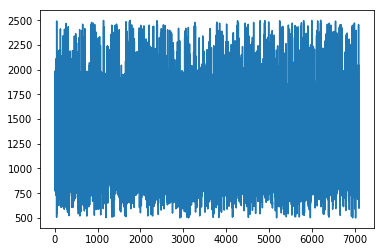

In [21]:
train['INT_SQFT'].plot()

In [22]:
train['INT_SQFT']

0       1004
1       1986
2        909
3       1855
4       1226
5       1220
6       1167
7       1847
8        771
9       1635
10      1203
11      1054
12      1196
13      1056
14      1865
15      1868
16      1639
17       796
18      1136
19      1902
20      1069
21       931
22      2010
23      1074
24      1972
25      1685
26      1130
27      1301
28       730
29      1806
        ... 
7079     934
7080     903
7081    1946
7082     791
7083    1992
7084     858
7085     990
7086     705
7087    1008
7088    1696
7089    1907
7090    1960
7091    2051
7092    1202
7093    1941
7094    2456
7095    1955
7096    1275
7097    1860
7098    1611
7099     895
7100    1733
7101     666
7102     701
7103    1462
7104     598
7105    1897
7106    1614
7107     787
7108    1896
Name: INT_SQFT, Length: 7109, dtype: int64

In [23]:
train.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chormpet         6
Chrmpet          6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [24]:
#replacing errors to the corresponding values
train.AREA.replace(['Chrompt', 'Chrmpet','Chormpet','TNagar', 'Ana Nagar','Ann Nagar', 'Karapakam', 'Velchery', 'KKNagar', 'Adyr'], \
['Chrompet', 'Chrompet', 'Chrompet','T Nagar', 'Anna Nagar', 'Anna Nagar', 'Karapakkam', 'Velachery', 'KK Nagar', 'Adyar'], inplace=True)

In [25]:
train.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [26]:
test.AREA.replace(['Velchery','Karapakam','Chrmpet','Ann Nagar', 'Chormpet', 'Chrompt'],\
['Velachery','Karapakkam','Chrompet','Anna Nagar','Chrompet','Chrompet'], inplace=True)

train.SALE_COND.replace(['Ab Normal', 'Adj Land','PartiaLl','Partiall'], \
['AbNormal', 'AdjLand', 'Partial','Partial'], inplace=True)

test.SALE_COND.replace(['Adj Land','PartiaLl','Partiall'], \
['AdjLand', 'Partial','Partial'], inplace=True)

train.PARK_FACIL.replace(['Noo'], \
['No'], inplace=True)

test.PARK_FACIL.replace(['Noo'], \
['No'], inplace=True)

train.BUILDTYPE.replace(['Other','Comercial'], \
['Others','Commercial'], inplace=True)

test.BUILDTYPE.replace(['Other','Comercial', 'Commercil'], \
['Others','Commercial', 'Commercial'], inplace=True)

train.UTILITY_AVAIL.replace(['All Pub'], \
['AllPub'], inplace=True)

test.UTILITY_AVAIL.replace(['All Pub'], \
['AllPub'], inplace=True)

train.STREET.replace(['Pavd', 'NoAccess'], \
['Paved', 'No Access'], inplace=True)

test.STREET.replace(['Pavd', 'NoAccess'], \
['Paved', 'No Access'], inplace=True)

In [27]:
train.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
PRT_ID           7109 non-null object
AREA             7109 non-null object
INT_SQFT         7109 non-null int64
DATE_SALE        7109 non-null object
DIST_MAINROAD    7109 non-null int64
N_BEDROOM        7108 non-null float64
N_BATHROOM       7104 non-null float64
N_ROOM           7109 non-null int64
SALE_COND        7109 non-null object
PARK_FACIL       7109 non-null object
DATE_BUILD       7109 non-null object
BUILDTYPE        7109 non-null object
UTILITY_AVAIL    7109 non-null object
STREET           7109 non-null object
MZZONE           7109 non-null object
QS_ROOMS         7109 non-null float64
QS_BATHROOM      7109 non-null float64
QS_BEDROOM       7109 non-null float64
QS_OVERALL       7061 non-null float64
REG_FEE          7109 non-null int64
COMMIS           7109 non-null int64
SALES_PRICE      7109 non-null int64
dtypes: float64(6), int64(6), object(10)
memory usage: 1.

In [29]:
#Dropping table
train = train.drop(['PRT_ID', 'DATE_SALE', 'DATE_BUILD'], axis=1)
# we assign
#verticle axis = 1
#horizontal axis = 0


In [30]:
train  = train.fillna(0)
#train = train.dropna(0)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
AREA             7109 non-null object
INT_SQFT         7109 non-null int64
DIST_MAINROAD    7109 non-null int64
N_BEDROOM        7109 non-null float64
N_BATHROOM       7109 non-null float64
N_ROOM           7109 non-null int64
SALE_COND        7109 non-null object
PARK_FACIL       7109 non-null object
BUILDTYPE        7109 non-null object
UTILITY_AVAIL    7109 non-null object
STREET           7109 non-null object
MZZONE           7109 non-null object
QS_ROOMS         7109 non-null float64
QS_BATHROOM      7109 non-null float64
QS_BEDROOM       7109 non-null float64
QS_OVERALL       7109 non-null float64
REG_FEE          7109 non-null int64
COMMIS           7109 non-null int64
SALES_PRICE      7109 non-null int64
dtypes: float64(6), int64(6), object(7)
memory usage: 1.0+ MB


In [32]:
train.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636798,1.212407,3.688704,3.517471,3.507244,3.485300,3.479600,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.803080,0.410756,1.019099,0.891972,0.897834,0.887266,0.598669,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.120000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [33]:
scale_list = ['INT_SQFT','DIST_MAINROAD','REG_FEE','COMMIS','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL']
sc = train[scale_list]

In [34]:
sc.head()

,INT_SQFT,DIST_MAINROAD,REG_FEE,COMMIS,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,1004,131,380000,144400,4.0,3.9,4.9,4.330
1,1986,26,760122,304049,4.9,4.2,2.5,3.765
2,909,70,421094,92114,4.1,3.8,2.2,3.090
3,1855,14,356321,77042,4.7,3.9,3.6,4.010
4,1226,84,237000,74063,3.0,2.5,4.1,3.290


In [35]:
scaler = StandardScaler()
sc = scaler.fit_transform(sc)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:616: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:459: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
train[scale_list] = sc


In [37]:
train[scale_list].head()

,INT_SQFT,DIST_MAINROAD,REG_FEE,COMMIS,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,-0.826608,0.546992,0.021401,0.043095,0.541007,0.437479,1.594560,1.420584
1,1.320409,-1.282306,2.678471,2.070061,1.550078,0.771640,-1.110568,0.476758
2,-1.034314,-0.515743,0.308650,-0.620748,0.653126,0.326092,-1.448709,-0.650822
3,1.033994,-1.491369,-0.144116,-0.812108,1.325840,0.437479,0.129282,0.886028
4,-0.341234,-0.271837,-0.978175,-0.849931,-0.580183,-1.121940,0.692850,-0.316724


 fit matlab direct algorithm per run karna 
 
 transform matlab run karke changes lana
 
 har ek scaling corresponding to its own column

In [38]:
sc[0]

array([-0.82660819,  0.54699179,  0.02140121,  0.04309502,  0.54100678,
        0.43747889,  1.59455962,  1.42058405])

In [39]:
sc.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

this error is because the data type is no further a data frame

In [40]:
encoding_list = ['AREA', 'SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL', 'STREET','MZZONE']
train[encoding_list] = train[encoding_list].apply(LabelEncoder().fit_transform)

In [41]:
train.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,4,-0.826608,0.546992,1.0,1.0,3,0,1,0,0,2,0,0.541007,0.437479,1.594560,1.420584,0.021401,0.043095,7600000
1,1,1.320409,-1.282306,2.0,1.0,5,0,0,0,0,0,3,1.550078,0.771640,-1.110568,0.476758,2.678471,2.070061,21717770
2,0,-1.034314,-0.515743,1.0,1.0,3,0,1,0,1,0,4,0.653126,0.326092,-1.448709,-0.650822,0.308650,-0.620748,13159200
3,6,1.033994,-1.491369,3.0,2.0,5,2,0,2,3,2,2,1.325840,0.437479,0.129282,0.886028,-0.144116,-0.812108,9630290
4,4,-0.341234,-0.271837,1.0,1.0,3,0,1,2,0,0,1,-0.580183,-1.121940,0.692850,-0.316724,-0.978175,-0.849931,7406250


#Linear Regression

In [42]:
y = train['SALES_PRICE']
x = train.drop('SALES_PRICE', axis=1)


In [43]:
y.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

In [44]:
x.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,4,-0.826608,0.546992,1.0,1.0,3,0,1,0,0,2,0,0.541007,0.437479,1.594560,1.420584,0.021401,0.043095
1,1,1.320409,-1.282306,2.0,1.0,5,0,0,0,0,0,3,1.550078,0.771640,-1.110568,0.476758,2.678471,2.070061
2,0,-1.034314,-0.515743,1.0,1.0,3,0,1,0,1,0,4,0.653126,0.326092,-1.448709,-0.650822,0.308650,-0.620748
3,6,1.033994,-1.491369,3.0,2.0,5,2,0,2,3,2,2,1.325840,0.437479,0.129282,0.886028,-0.144116,-0.812108
4,4,-0.341234,-0.271837,1.0,1.0,3,0,1,2,0,0,1,-0.580183,-1.121940,0.692850,-0.316724,-0.978175,-0.849931


In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.3)

In [46]:

X_train.shape

(4976, 18)

In [47]:
X_test.shape

(2133, 18)

In [48]:
y_test.shape

(2133,)

In [49]:
logreg=LinearRegression()

In [50]:
#training
logreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
LinearRegression().fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
y_pred=logreg.predict(X_test)

In [53]:
y_test

796     10646530
6763     7176980
4110    11073340
3078    13131500
3126     7216250
3567    11399205
1626    12370100
335      7390000
3080     9626920
5339    10353315
4514    15032380
216      7427820
5308    12142520
4152    11513500
1397     9089160
1343    16595470
3744     9155320
179      4928250
1636     9426345
1542    13840180
4547    21330680
3659    12196780
1760     8700500
3462    10031100
5408    11174665
2419     8446600
2433     4155500
1551     8147530
6719    19147860
4369    10252060
          ...   
1088    12605360
4132     7839500
2404    11141710
4925     9550950
4663    11514600
5519    14704500
5100    11408210
1448     9343170
5941     5623500
4763     7058310
713      9329030
3093    13179060
5855    12787100
4612     8416200
1163    11084700
4589     9299500
4791    14272420
322      7451690
1511    20234860
4327    15399860
585     22181670
4460    10699500
1736    14211850
1611     8599095
1805     6149410
2708     8424480
3668    10180900
5607     97158

In [54]:
y_pred[0:6]

array([10083229.9002929 ,  5782397.94600218, 10086750.55052391,
       12896829.75731947,  7776688.61017915, 10547549.9944239 ])

In [55]:
print(metrics.mean_squared_error(y_test, y_pred))

1680999458531.9421


In [56]:
xgb = xgboost.XGBRegressor(n_estimators=25000, learning_rate=0.06, gamma=0, subsample=0.6,
                           colsample_bytree=0.7, min_child_weight=4, max_depth=3)

In [ ]:
xgb.fit(X_train,y_train)

In [ ]:
predictions = xgb.predict(X_test)


In [ ]:
print(sqrt(metrics.mean_squared_error(y_test, predictions)))